In [1]:
import numpy as np
from numpy.linalg import det, inv
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

from anneling_one import Annealing1

In [2]:
a1 = [1,0]; a2=[0,1];
A  = np.transpose([a1,a2]);

theta =  np.pi/4;
R = [ [ np.cos(theta), -np.sin(theta)], [ np.sin(theta),  np.cos(theta)] ];

b1 = np.sqrt(2)*np.dot(R,a1);  b2 = np.sqrt(2)*np.dot(R,a2); #a2
#b1 = [np.sqrt(2),0]; b2=[0,np.sqrt(2)];

B  = np.transpose([b1,b2]);

a = A#np.array([[0,1],[1,0]])
b = B#np.array([[0,5],[5,0]])

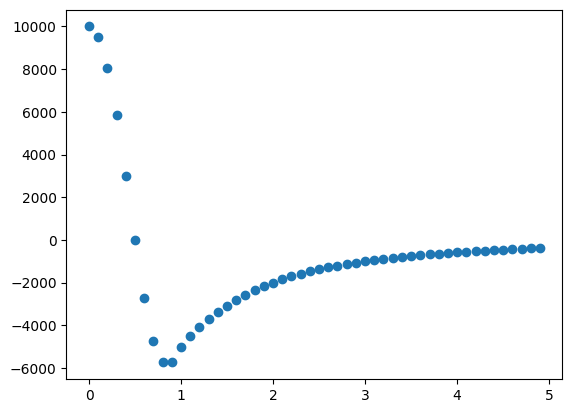

In [3]:
def at_sin(x, up =9999):
    
    tr_x= (x + 0.5)
    
    if x<1:
        res = up*(1/(1+x**4))* np.sin(tr_x*np.pi)
    else:
        res = (x-1)**2 -up*(1/(1+x**2))
    return res

X = [i*0.1 for i in range(0,50,1)]
Y= [at_sin(x) for x in X]

plt.scatter(X,Y)

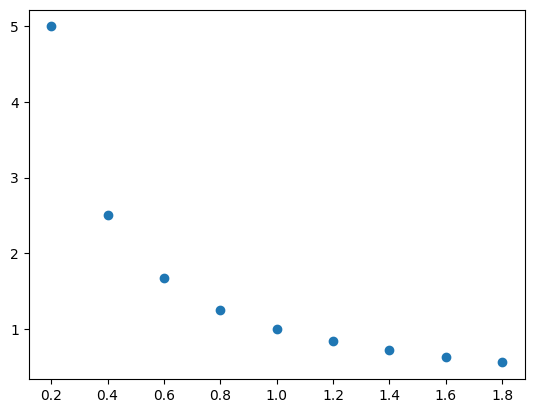

In [4]:
X = [i*0.2 for i in range(1,10,1)]
Y= [ 1/(x+0.00001) for x in X]

plt.scatter(X,Y)

In [5]:
# a = np.array([[0,1],[1,0]])
# b = np.sqrt(2)*np.array([[0,5],[5,0]])
eps = 0.0001

bond=10

def tAtB(params):
    tA = np.array([[params[0],params[1]],
                   [params[2],params[3]]])
    
    tB = np.dot(np.dot(tA,a), inv(b)) # tAa=tBb
    
    return tA, tB
          
def fit_fucntion(params , k_p=999):
          
        tA, tB= tAtB(params)
        tAa= np.dot(tA,a)
        tBb= np.dot(tB,b)
        
        # main condition
        zero_mat= tAa - tBb
        s=0
        for row in zero_mat:
            for e in row:
                s+=e*e
        
        # mimimum TA
        detTAa= det(tAa)*det(tAa) # minimum but biger than 0
        detTBb= det(tBb)*det(tBb)
        
        # TB integer 
        cons =9999999
        tB_con = 0  
        for row in tB:
            for e in row:
                tB_con += ((round(e)-e))*((round(e)-e)) # e*e
        tB_con = tB_con*cons
        
        up =9999
        if(detTAa>1):
            up=up/2
        f =  at_sin(detTAa)+ tB_con**2 
        #((1-detTAa)**2)*k_p + tB_con**2
        
        
        return f 

In [6]:
# Experiment settings

#Hyperparameters of the model
model_par = {
    
    'initialTemp': 4, 
    'finalTemp': 0.0003,

    'beta': 10,
    'bounds': [[-2*bond,2*bond] for _ in range(4)],

    'nr_neighbours': 1,
    'step_size': 4,
    'gaussian_sd':3,
    
    'known_min': 0
    
}



#
input_size = 4 # since our function has one variable this is a trivial scenario.
start_point = [1,5,3,2]

# Experiment
experiment = Annealing1(fit_fucntion ,start_point, model_par)

In [7]:
epochs= 40
history_book = experiment.evolve( epochs, prints_p=5)

temp:4|epoch:0|change:-21400365077438.645|value:2395166987699.654
temp:4|epoch:5|change:-362578259895.7224|value:2032588727803.9314
temp:4|epoch:10|change:433916705640.9319|value:1457226002267.2156
temp:4|epoch:15|change:8893304991470.338|value:1457226002267.2156
temp:4|epoch:20|change:17676945407522.7|value:833027474625.3749
temp:4|epoch:25|change:3224916162082.3687|value:833027474625.3749
temp:4|epoch:30|change:17034505854719.3|value:833027474625.3749
temp:4|epoch:35|change:5966091118359.325|value:833027474625.3749
temp:0.0975609756097561|epoch:0|change:4230886403437.652|value:140630391755.8141
temp:0.0975609756097561|epoch:5|change:2923197948710.3774|value:140630391755.8141
temp:0.0975609756097561|epoch:10|change:11664118025251.549|value:140630391755.8141
temp:0.0975609756097561|epoch:15|change:11838930006392.062|value:140630391755.8141
temp:0.0975609756097561|epoch:20|change:13432102764656.885|value:140630391755.8141
temp:0.0975609756097561|epoch:25|change:20720726371459.41|value:1

temp:0.007677543186180423|epoch:35|change:24062121955396.668|value:22964767769.643803
temp:0.007130124777183602|epoch:0|change:5096542132725.731|value:22964767769.643803
temp:0.007130124777183602|epoch:5|change:43512393772962.48|value:22964767769.643803
temp:0.007130124777183602|epoch:10|change:12486073372153.613|value:22964767769.643803
temp:0.007130124777183602|epoch:15|change:4241345206625.1685|value:22964767769.643803
temp:0.007130124777183602|epoch:20|change:391242439431.2798|value:22964767769.643803
temp:0.007130124777183602|epoch:25|change:14816006950229.234|value:22964767769.643803
temp:0.007130124777183602|epoch:30|change:17981391325200.82|value:22964767769.643803
temp:0.007130124777183602|epoch:35|change:5424879428072.506|value:22964767769.643803
temp:0.006655574043261232|epoch:0|change:43512471600363.48|value:22964767769.643803
temp:0.006655574043261232|epoch:5|change:12455478308531.664|value:22964767769.643803
temp:0.006655574043261232|epoch:10|change:41591803261951.21|valu

temp:0.0038424591738712775|epoch:0|change:11781931718613.654|value:22964767769.643803
temp:0.0038424591738712775|epoch:5|change:14462176773263.465|value:22964767769.643803
temp:0.0038424591738712775|epoch:10|change:21027032698694.895|value:22964767769.643803
temp:0.0038424591738712775|epoch:15|change:7797663477964.258|value:22964767769.643803
temp:0.0038424591738712775|epoch:20|change:17592023736205.871|value:22964767769.643803
temp:0.0038424591738712775|epoch:25|change:7130562974353.042|value:22964767769.643803
temp:0.0038424591738712775|epoch:30|change:21923511209376.508|value:22964767769.643803
temp:0.0038424591738712775|epoch:35|change:20149234306384.59|value:22964767769.643803
temp:0.0037002775208140612|epoch:0|change:271422060430.93756|value:22964767769.643803
temp:0.0037002775208140612|epoch:5|change:17767671013493.47|value:22964767769.643803
temp:0.0037002775208140612|epoch:10|change:7019091314233.686|value:22964767769.643803
temp:0.0037002775208140612|epoch:15|change:237232065

temp:0.00249843847595253|epoch:20|change:7306220011941.138|value:6438770173.077669
temp:0.00249843847595253|epoch:25|change:7171231082083.659|value:6438770173.077669
temp:0.00249843847595253|epoch:30|change:4795287000580.113|value:6438770173.077669
temp:0.00249843847595253|epoch:35|change:1226558258647.606|value:6438770173.077669
temp:0.0024375380865326026|epoch:0|change:15027415148403.146|value:6438770173.077669
temp:0.0024375380865326026|epoch:5|change:7582513381132.457|value:6438770173.077669
temp:0.0024375380865326026|epoch:10|change:6770103900294.759|value:6438770173.077669
temp:0.0024375380865326026|epoch:15|change:3671609715219.5845|value:6438770173.077669
temp:0.0024375380865326026|epoch:20|change:4069110805842.1094|value:6438770173.077669
temp:0.0024375380865326026|epoch:25|change:12002413639578.512|value:6438770173.077669
temp:0.0024375380865326026|epoch:30|change:1759866951625.7988|value:6438770173.077669
temp:0.0024375380865326026|epoch:35|change:4795287000580.113|value:643

temp:0.0018173557473875517|epoch:5|change:24540374007313.715|value:18782794.810520396
temp:0.0018173557473875517|epoch:10|change:13914124423019.691|value:18782794.810520396
temp:0.0018173557473875517|epoch:15|change:34960041471773.96|value:18782794.810520396
temp:0.0018173557473875517|epoch:20|change:12837699407796.79|value:18782794.810520396
temp:0.0018173557473875517|epoch:25|change:10814914330815.227|value:18782794.810520396
temp:0.0018173557473875517|epoch:30|change:21050000162069.57|value:18782794.810520396
temp:0.0018173557473875517|epoch:35|change:8965408952741.004|value:18782794.810520396
temp:0.0017849174475680506|epoch:0|change:26020310095083.105|value:18782794.810520396
temp:0.0017849174475680506|epoch:5|change:11978936494746.082|value:18782794.810520396
temp:0.0017849174475680506|epoch:10|change:919428548281.1027|value:18782794.810520396
temp:0.0017849174475680506|epoch:15|change:1396690211841.3157|value:18782794.810520396
temp:0.0017849174475680506|epoch:20|change:27809274

temp:0.0014487504527345167|epoch:0|change:4057924881576.5835|value:18782794.810520396
temp:0.0014487504527345167|epoch:5|change:879743706720.9257|value:18782794.810520396
temp:0.0014487504527345167|epoch:10|change:2105213968076.974|value:18782794.810520396
temp:0.0014487504527345167|epoch:15|change:5908621570543.585|value:18782794.810520396
temp:0.0014487504527345167|epoch:20|change:19721082155859.38|value:18782794.810520396
temp:0.0014487504527345167|epoch:25|change:2872482184093.271|value:18782794.810520396
temp:0.0014487504527345167|epoch:30|change:17614585056284.55|value:18782794.810520396
temp:0.0014487504527345167|epoch:35|change:2179141945761.2646|value:18782794.810520396
temp:0.0014280614066404858|epoch:0|change:5447827816344.358|value:18782794.810520396
temp:0.0014280614066404858|epoch:5|change:25551378154984.98|value:18782794.810520396
temp:0.0014280614066404858|epoch:10|change:1123397008714.247|value:18782794.810520396
temp:0.0014280614066404858|epoch:15|change:9553717123535

temp:0.0012044564890093343|epoch:0|change:13572590075193.924|value:18782794.810520396
temp:0.0012044564890093343|epoch:5|change:14103138653400.951|value:18782794.810520396
temp:0.0012044564890093343|epoch:10|change:879743810489.7875|value:18782794.810520396
temp:0.0012044564890093343|epoch:15|change:1834088516169.0918|value:18782794.810520396
temp:0.0012044564890093343|epoch:20|change:2179183221561.2773|value:18782794.810520396
temp:0.0012044564890093343|epoch:25|change:62770855825195.08|value:18782794.810520396
temp:0.0012044564890093343|epoch:30|change:6156594894758.0|value:18782794.810520396
temp:0.0012044564890093343|epoch:35|change:12837699407796.79|value:18782794.810520396
temp:0.001190121987503719|epoch:0|change:21751029297425.79|value:18782794.810520396
temp:0.001190121987503719|epoch:5|change:14293437339056.75|value:18782794.810520396
temp:0.001190121987503719|epoch:10|change:15592839937452.107|value:18782794.810520396
temp:0.001190121987503719|epoch:15|change:8965467240333.04

temp:0.0010306622004637976|epoch:10|change:9896109615047.283|value:18782794.810520396
temp:0.0010306622004637976|epoch:15|change:29657727703192.098|value:18782794.810520396
temp:0.0010306622004637976|epoch:20|change:6645756558407.862|value:18782794.810520396
temp:0.0010306622004637976|epoch:25|change:10188359744064.906|value:18782794.810520396
temp:0.0010306622004637976|epoch:30|change:4475136028200.443|value:18782794.810520396
temp:0.0010306622004637976|epoch:35|change:95657248283.76982|value:18782794.810520396
temp:0.0010201479214486096|epoch:0|change:29657727703192.27|value:18782794.810520396
temp:0.0010201479214486096|epoch:5|change:3678074165252.798|value:18782794.810520396
temp:0.0010201479214486096|epoch:10|change:7844895018557.18|value:18782794.810520396
temp:0.0010201479214486096|epoch:15|change:14452067030407.771|value:18782794.810520396
temp:0.0010201479214486096|epoch:20|change:16776896764340.193|value:18782794.810520396
temp:0.0010201479214486096|epoch:25|change:2454038825

temp:0.0009172208209126342|epoch:5|change:5427609302650.717|value:18782794.810520396
temp:0.0009172208209126342|epoch:10|change:9553713355910.133|value:18782794.810520396
temp:0.0009172208209126342|epoch:15|change:24540382337362.75|value:18782794.810520396
temp:0.0009172208209126342|epoch:20|change:2105266150286.3848|value:18782794.810520396
temp:0.0009172208209126342|epoch:25|change:3135098433790.1685|value:18782794.810520396
temp:0.0009172208209126342|epoch:30|change:15034021094853.475|value:18782794.810520396
temp:0.0009172208209126342|epoch:35|change:19053949947099.797|value:18782794.810520396
temp:0.000908884344467166|epoch:0|change:8543526345100.035|value:18782794.810520396
temp:0.000908884344467166|epoch:5|change:13539863866694.928|value:18782794.810520396
temp:0.000908884344467166|epoch:10|change:11149673887460.65|value:18782794.810520396
temp:0.000908884344467166|epoch:15|change:1396690211841.3157|value:18782794.810520396
temp:0.000908884344467166|epoch:20|change:4037685823400

temp:0.0008128429181060755|epoch:25|change:26020307272458.145|value:18782794.810520396
temp:0.0008128429181060755|epoch:30|change:1891121132890.3555|value:18782794.810520396
temp:0.0008128429181060755|epoch:35|change:9710618287347.686|value:18782794.810520396
temp:0.0008062890546260829|epoch:0|change:18871738918376.72|value:18782794.810520396
temp:0.0008062890546260829|epoch:5|change:33482836114438.824|value:18782794.810520396
temp:0.0008062890546260829|epoch:10|change:25296712102065.39|value:18782794.810520396
temp:0.0008062890546260829|epoch:15|change:13019300126106.84|value:18782794.810520396
temp:0.0008062890546260829|epoch:20|change:20589122033729.94|value:18782794.810520396
temp:0.0008062890546260829|epoch:25|change:222089558931.4208|value:18782794.810520396
temp:0.0008062890546260829|epoch:30|change:13019325517906.945|value:18782794.810520396
temp:0.0008062890546260829|epoch:35|change:40376858234008.85|value:18782794.810520396
temp:0.0007998400319936008|epoch:0|change:2334722967

temp:0.0007297938332421085|epoch:35|change:21710500519084.223|value:18782794.810520396
temp:0.0007245064299945656|epoch:0|change:15627047132205.762|value:18782794.810520396
temp:0.0007245064299945656|epoch:5|change:15033888551556.428|value:18782794.810520396
temp:0.0007245064299945656|epoch:10|change:17827825092581.062|value:18782794.810520396
temp:0.0007245064299945656|epoch:15|change:14644705000304.844|value:18782794.810520396
temp:0.0007245064299945656|epoch:20|change:2703718251326.428|value:18782794.810520396
temp:0.0007245064299945656|epoch:25|change:5448407055768.357|value:18782794.810520396
temp:0.0007245064299945656|epoch:30|change:29934295256579.55|value:18782794.810520396
temp:0.0007245064299945656|epoch:35|change:787571760376.3104|value:18782794.810520396
temp:0.0007192950908110046|epoch:0|change:13354642859463.652|value:18782794.810520396
temp:0.0007192950908110046|epoch:5|change:30720086309993.453|value:18782794.810520396
temp:0.0007192950908110046|epoch:10|change:32242995

temp:0.0006621420294653197|epoch:35|change:8542781835724.054|value:18782794.810520396
temp:0.0006577865482650873|epoch:0|change:33482835320070.727|value:18782794.810520396
temp:0.0006577865482650873|epoch:5|change:9424924048447.637|value:18782794.810520396
temp:0.0006577865482650873|epoch:10|change:39159610139670.29|value:18782794.810520396
temp:0.0006577865482650873|epoch:15|change:1507960948667.8372|value:18782794.810520396
temp:0.0006577865482650873|epoch:20|change:12478324312926.312|value:18782794.810520396
temp:0.0006577865482650873|epoch:25|change:13386440405552.082|value:18782794.810520396
temp:0.0006577865482650873|epoch:30|change:34960037052134.875|value:18782794.810520396
temp:0.0006577865482650873|epoch:35|change:18004291369000.54|value:18782794.810520396
temp:0.0006534879921581434|epoch:0|change:246404966622.95984|value:18782794.810520396
temp:0.0006534879921581434|epoch:5|change:14103868489808.16|value:18782794.810520396
temp:0.0006534879921581434|epoch:10|change:677652125

temp:0.0006059687926071803|epoch:30|change:9398239799396.96|value:18782794.810520396
temp:0.0006059687926071803|epoch:35|change:3758443098041.974|value:18782794.810520396
temp:0.0006023189278723081|epoch:0|change:7042026222728.477|value:18782794.810520396
temp:0.0006023189278723081|epoch:5|change:39103115681236.43|value:18782794.810520396
temp:0.0006023189278723081|epoch:10|change:7153570794430.896|value:18782794.810520396
temp:0.0006023189278723081|epoch:15|change:7564792629670.739|value:18782794.810520396
temp:0.0006023189278723081|epoch:20|change:6260818865853.088|value:18782794.810520396
temp:0.0006023189278723081|epoch:25|change:5447936392119.359|value:18782794.810520396
temp:0.0006023189278723081|epoch:30|change:19497407073823.484|value:18782794.810520396
temp:0.0006023189278723081|epoch:35|change:20360539021950.37|value:18782794.810520396
temp:0.0005987127675497677|epoch:0|change:8965411474757.059|value:18782794.810520396
temp:0.0005987127675497677|epoch:5|change:6135079041405.6

temp:0.000555478405776975|epoch:0|change:12300549950056.57|value:18782794.810520396
temp:0.000555478405776975|epoch:5|change:25296832296616.56|value:18782794.810520396
temp:0.000555478405776975|epoch:10|change:9710460961058.734|value:18782794.810520396
temp:0.000555478405776975|epoch:15|change:14485022784635.646|value:18782794.810520396
temp:0.000555478405776975|epoch:20|change:3392924693827.9497|value:18782794.810520396
temp:0.000555478405776975|epoch:25|change:9270538872969.725|value:18782794.810520396
temp:0.000555478405776975|epoch:30|change:18041927944057.48|value:18782794.810520396
temp:0.000555478405776975|epoch:35|change:29933402393795.598|value:18782794.810520396
temp:0.0005524098881369973|epoch:0|change:7426215942859.173|value:18782794.810520396
temp:0.0005524098881369973|epoch:5|change:1903840157988.2092|value:18782794.810520396
temp:0.0005524098881369973|epoch:10|change:33826117399512.195|value:18782794.810520396
temp:0.0005524098881369973|epoch:15|change:25043322576595.363

temp:0.0005207655253222236|epoch:0|change:28885047642711.574|value:18782794.810520396
temp:0.0005207655253222236|epoch:5|change:322552337515.9758|value:18782794.810520396
temp:0.0005207655253222236|epoch:10|change:19946061956106.355|value:18782794.810520396
temp:0.0005207655253222236|epoch:15|change:787549433401.284|value:18782794.810520396
temp:0.0005207655253222236|epoch:20|change:15033949789221.275|value:18782794.810520396
temp:0.0005207655253222236|epoch:25|change:3209410801886.1987|value:18782794.810520396
temp:0.0005207655253222236|epoch:30|change:12124051006651.576|value:18782794.810520396
temp:0.0005207655253222236|epoch:35|change:15428035811754.275|value:18782794.810520396
temp:0.0005180676078228208|epoch:0|change:6157153736358.058|value:18782794.810520396
temp:0.0005180676078228208|epoch:5|change:700457200496.0936|value:18782794.810520396
temp:0.0005180676078228208|epoch:10|change:16984392887125.035|value:18782794.810520396
temp:0.0005180676078228208|epoch:15|change:231454370

temp:0.00048537798810823927|epoch:25|change:23347169996976.305|value:18782794.810520396
temp:0.00048537798810823927|epoch:30|change:29933465165196.734|value:18782794.810520396
temp:0.00048537798810823927|epoch:35|change:7704266502283.0|value:18782794.810520396
temp:0.0004830334500664171|epoch:0|change:17827186018147.426|value:18782794.810520396
temp:0.0004830334500664171|epoch:5|change:1177516427956.471|value:18782794.810520396
temp:0.0004830334500664171|epoch:10|change:7176718482325.952|value:18782794.810520396
temp:0.0004830334500664171|epoch:15|change:14678267783655.049|value:18782794.810520396
temp:0.0004830334500664171|epoch:20|change:3300530019343.513|value:18782794.810520396
temp:0.0004830334500664171|epoch:25|change:16400845971444.902|value:18782794.810520396
temp:0.0004830334500664171|epoch:30|change:2958592422165.7876|value:18782794.810520396
temp:0.0004830334500664171|epoch:35|change:11489687515058.346|value:18782794.810520396
temp:0.00048071145295036654|epoch:0|change:27184

temp:0.0004544938075218728|epoch:0|change:10513340429583.912|value:18782794.810520396
temp:0.0004544938075218728|epoch:5|change:18219297247807.586|value:18782794.810520396
temp:0.0004544938075218728|epoch:10|change:1279953981337.3813|value:18782794.810520396
temp:0.0004544938075218728|epoch:15|change:3486752077710.636|value:18782794.810520396
temp:0.0004544938075218728|epoch:20|change:27809274838138.504|value:18782794.810520396
temp:0.0004544938075218728|epoch:25|change:7540674837414.421|value:18782794.810520396
temp:0.0004544938075218728|epoch:30|change:18435481050316.51|value:18782794.810520396
temp:0.0004544938075218728|epoch:35|change:7845395416541.169|value:18782794.810520396
temp:0.00045243750706933637|epoch:0|change:12837787914294.35|value:18782794.810520396
temp:0.00045243750706933637|epoch:5|change:5908475222767.326|value:18782794.810520396
temp:0.00045243750706933637|epoch:10|change:12478324308505.95|value:18782794.810520396
temp:0.00045243750706933637|epoch:15|change:1301997

temp:0.0004309880400818881|epoch:0|change:3581540309345.6685|value:18782794.810520396
temp:0.0004309880400818881|epoch:5|change:2635348615064.91|value:18782794.810520396
temp:0.0004309880400818881|epoch:10|change:6645683104528.894|value:18782794.810520396
temp:0.0004309880400818881|epoch:15|change:4763464148898.663|value:18782794.810520396
temp:0.0004309880400818881|epoch:20|change:24584007439280.41|value:18782794.810520396
temp:0.0004309880400818881|epoch:25|change:17403238482281.139|value:18782794.810520396
temp:0.0004309880400818881|epoch:30|change:9868610940788.363|value:18782794.810520396
temp:0.0004309880400818881|epoch:35|change:11631742165341.314|value:18782794.810520396
temp:0.00042913850445231236|epoch:0|change:12124051052860.877|value:18782794.810520396
temp:0.00042913850445231236|epoch:5|change:7844863750181.1875|value:18782794.810520396
temp:0.00042913850445231236|epoch:10|change:30440781903929.367|value:18782794.810520396
temp:0.00042913850445231236|epoch:15|change:688587

temp:0.00040812162024283263|epoch:30|change:23103770344188.742|value:18782794.810520396
temp:0.00040812162024283263|epoch:35|change:40376621847350.414|value:18782794.810520396
temp:0.00040646275784981227|epoch:0|change:25807968807156.867|value:18782794.810520396
temp:0.00040646275784981227|epoch:5|change:11149873275196.63|value:18782794.810520396
temp:0.00040646275784981227|epoch:10|change:2254375822382.2227|value:18782794.810520396
temp:0.00040646275784981227|epoch:15|change:24290810666370.75|value:18782794.810520396
temp:0.00040646275784981227|epoch:20|change:19091760222200.008|value:18782794.810520396
temp:0.00040646275784981227|epoch:25|change:10485315578562.084|value:18782794.810520396
temp:0.00040646275784981227|epoch:30|change:4672593085543.705|value:18782794.810520396
temp:0.00040646275784981227|epoch:35|change:23838024497668.61|value:18782794.810520396
temp:0.00040481732618156084|epoch:0|change:5214599923401.711|value:18782794.810520396
temp:0.00040481732618156084|epoch:5|chan

temp:0.0003860631213203363|epoch:30|change:18258180085410.953|value:18782794.810520396
temp:0.0003860631213203363|epoch:35|change:32661348015547.074|value:18782794.810520396
temp:0.0003845784059225078|epoch:0|change:17440656464720.9|value:18782794.810520396
temp:0.0003845784059225078|epoch:5|change:1903100894883.202|value:18782794.810520396
temp:0.0003845784059225078|epoch:10|change:6031923675599.827|value:18782794.810520396
temp:0.0003845784059225078|epoch:15|change:32661344157490.086|value:18782794.810520396
temp:0.0003845784059225078|epoch:20|change:10188358719521.895|value:18782794.810520396
temp:0.0003845784059225078|epoch:25|change:17827367051205.906|value:18782794.810520396
temp:0.0003845784059225078|epoch:30|change:31565618474439.08|value:18782794.810520396
temp:0.0003845784059225078|epoch:35|change:21282609206228.535|value:18782794.810520396
temp:0.0003831050665645057|epoch:0|change:7845268214501.08|value:18782794.810520396
temp:0.0003831050665645057|epoch:5|change:41603155527

temp:0.00036493020709789305|epoch:15|change:6031932828175.79|value:18782794.810520396
temp:0.00036493020709789305|epoch:20|change:9424846726046.758|value:18782794.810520396
temp:0.00036493020709789305|epoch:25|change:19946130772491.355|value:18782794.810520396
temp:0.00036493020709789305|epoch:30|change:7564502021542.771|value:18782794.810520396
temp:0.00036493020709789305|epoch:35|change:5008745467325.242|value:18782794.810520396
temp:0.0003636033087901105|epoch:0|change:22183802257295.645|value:18782794.810520396
temp:0.0003636033087901105|epoch:5|change:24333598003320.285|value:18782794.810520396
temp:0.0003636033087901105|epoch:10|change:2717977411479.788|value:18782794.810520396
temp:0.0003636033087901105|epoch:15|change:28344509139692.074|value:18782794.810520396
temp:0.0003636033087901105|epoch:20|change:3581740808547.173|value:18782794.810520396
temp:0.0003636033087901105|epoch:25|change:11489716574482.38|value:18782794.810520396
temp:0.0003636033087901105|epoch:30|change:70046

temp:0.00034840170716836567|epoch:25|change:3410776937363.8984|value:18782794.810520396
temp:0.00034840170716836567|epoch:30|change:16606504609982.387|value:18782794.810520396
temp:0.00034840170716836567|epoch:35|change:14260694672410.635|value:18782794.810520396
temp:0.00034719208402048487|epoch:0|change:12124051810886.006|value:18782794.810520396
temp:0.00034719208402048487|epoch:5|change:27589252258963.863|value:18782794.810520396
temp:0.00034719208402048487|epoch:10|change:5566342676849.833|value:18782794.810520396
temp:0.00034719208402048487|epoch:15|change:751001510098.5266|value:18782794.810520396
temp:0.00034719208402048487|epoch:20|change:4893620460703.664|value:18782794.810520396
temp:0.00034719208402048487|epoch:25|change:14485149003462.256|value:18782794.810520396
temp:0.00034719208402048487|epoch:30|change:29933413409795.38|value:18782794.810520396
temp:0.00034719208402048487|epoch:35|change:16570649451121.236|value:18782794.810520396
temp:0.00034599083124297263|epoch:0|ch

temp:0.0003321983223984724|epoch:35|change:8250085567476.98|value:18782794.810520396
temp:0.0003310984190050497|epoch:0|change:23145624399174.227|value:18782794.810520396
temp:0.0003310984190050497|epoch:5|change:22183715230095.51|value:18782794.810520396
temp:0.0003310984190050497|epoch:10|change:7564494372550.793|value:18782794.810520396
temp:0.0003310984190050497|epoch:15|change:19092263604801.08|value:18782794.810520396
temp:0.0003310984190050497|epoch:20|change:5786364138386.47|value:18782794.810520396
temp:0.0003310984190050497|epoch:25|change:31850223990206.78|value:18782794.810520396
temp:0.0003310984190050497|epoch:30|change:16606304844606.387|value:18782794.810520396
temp:0.0003310984190050497|epoch:35|change:6409749685327.726|value:18782794.810520396
temp:0.00033000577510106473|epoch:0|change:1961213440286.9395|value:18782794.810520396
temp:0.00033000577510106473|epoch:5|change:8250096648638.018|value:18782794.810520396
temp:0.00033000577510106473|epoch:10|change:48496262915

temp:0.00031743512419649285|epoch:30|change:23103779200413.703|value:18782794.810520396
temp:0.00031743512419649285|epoch:35|change:20172177221215.074|value:18782794.810520396
temp:0.000316430662131161|epoch:0|change:27324710993235.926|value:18782794.810520396
temp:0.000316430662131161|epoch:5|change:927754279496.2148|value:18782794.810520396
temp:0.000316430662131161|epoch:10|change:6776905186074.018|value:18782794.810520396
temp:0.000316430662131161|epoch:15|change:7564943397966.836|value:18782794.810520396
temp:0.000316430662131161|epoch:20|change:1699760874873.0745|value:18782794.810520396
temp:0.000316430662131161|epoch:25|change:13726418604756.295|value:18782794.810520396
temp:0.000316430662131161|epoch:30|change:12478324926594.473|value:18782794.810520396
temp:0.000316430662131161|epoch:35|change:27855494917480.8|value:18782794.810520396
temp:0.00031543253686617823|epoch:0|change:5330567798864.109|value:18782794.810520396
temp:0.00031543253686617823|epoch:5|change:26020366304907

temp:0.0003057870193410294|epoch:30|change:17614969721180.7|value:18782794.810520396
temp:0.0003057870193410294|epoch:35|change:10649503366014.531|value:18782794.810520396
temp:0.000304854812895359|epoch:0|change:18435481050316.52|value:18782794.810520396
temp:0.000304854812895359|epoch:5|change:17790620111636.785|value:18782794.810520396
temp:0.000304854812895359|epoch:10|change:9117543898560.887|value:18782794.810520396
temp:0.000304854812895359|epoch:15|change:2317590423771.337|value:18782794.810520396
temp:0.000304854812895359|epoch:20|change:7289249878431.771|value:18782794.810520396
temp:0.000304854812895359|epoch:25|change:15034021094853.475|value:18782794.810520396
temp:0.000304854812895359|epoch:30|change:548012914026.0472|value:18782794.810520396
temp:0.000304854812895359|epoch:35|change:1457013825168.4058|value:18782794.810520396
temp:0.0003039282729275895|epoch:0|change:15627197043181.709|value:18782794.810520396
temp:0.0003039282729275895|epoch:5|change:8542770482179.052|v

In [8]:
solution = experiment.actual_solution
tA ,tB =tAtB(solution )
zero_mat= np.dot(tA,a) - np.dot(tB,b)
print("\n _____\n tA:\n",tA)
print("det:",det(tA))
print("\n _____\n tB:\n",tB)
print("det:",det(tB))
print("\n zero_mat:\n",zero_mat)



 _____
 tA:
 [[-17   0]
 [  0   0]]
det: 0.0

 _____
 tB:
 [[-12.02081528   0.        ]
 [  0.           0.        ]]
det: 0.0

 zero_mat:
 [[0. 0.]
 [0. 0.]]


In [9]:
#StB=tB_round
def get_strain(tB):
    tBr= tB.copy()
    for i in range(len(tB)):
        for j in range(len(tB[0])):
            tBr[i][j]=round(tB[i][j])
    S =np.dot(tBr,inv(tB))
    return(S)

S= get_strain(tB)
print("Strain:",get_strain(tB))

LinAlgError: Singular matrix

In [ ]:
plt.plot(history_book['values'])
plt.title("Values")